In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


from collections import  Counter
plt.style.use('ggplot')

import re
import string
from collections import defaultdict
from tqdm import tqdm
from keras.initializers import Constant
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import os
os.listdir('/content/dataset')

['train.csv', 'test.csv']

In [4]:
train = pd.read_csv('/content/dataset/train.csv')
test = pd.read_csv('/content/dataset/test.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train.drop(labels='location',axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


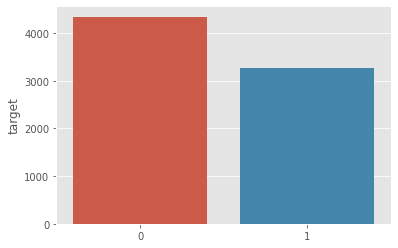

In [9]:
x = train['target'].value_counts()
sns.barplot(x.index,x)

In [11]:
print(train.iloc[0:10])

   id keyword                                               text  target
0   1     NaN  Our Deeds are the Reason of this #earthquake M...       1
1   4     NaN             Forest fire near La Ronge Sask. Canada       1
2   5     NaN  All residents asked to 'shelter in place' are ...       1
3   6     NaN  13,000 people receive #wildfires evacuation or...       1
4   7     NaN  Just got sent this photo from Ruby #Alaska as ...       1
5   8     NaN  #RockyFire Update => California Hwy. 20 closed...       1
6  10     NaN  #flood #disaster Heavy rain causes flash flood...       1
7  13     NaN  I'm on top of the hill and I can see a fire in...       1
8  14     NaN  There's an emergency evacuation happening now ...       1
9  15     NaN  I'm afraid that the tornado is coming to our a...       1


In [17]:
def clean(tweet):
  tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)
  tweet = re.sub(r'RT', '', tweet)
  tweet = re.sub(r'https?://\S+|www\.\S+','',tweet)
  tweet = re.sub(r'<.*?>','',tweet)
  tweet = re.sub("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", '', tweet)
  table=str.maketrans('','',string.punctuation)
  cleaned = tweet.translate(table)
  return cleaned

In [20]:
sample_text = 'RT@name.surname Hello!😃 please follow the following page www.instagram.com/username 😃'
print(clean(sample_text))

namesurname Hello please follow the following page  


In [21]:
train['text'] = train['text'].apply(lambda x: clean(x))

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
def create_corpus(df):
  corpus=[]
  for tweet in tqdm(df['text']):
    words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
    corpus.append(words)
  
  return corpus

In [24]:
corpus = create_corpus(train)

100%|██████████| 7613/7613 [00:00<00:00, 7882.50it/s]


In [25]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences=tokenizer.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=50,truncating='post',padding='post')

In [26]:
embedding_dict={}
with open('/content/drive/My Drive/Embedding/glove_100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [28]:
print(embedding_dict.get('hello'))

[ 0.26688    0.39632    0.6169    -0.77451   -0.1039     0.26697
  0.2788     0.30992    0.0054685 -0.085256   0.73602   -0.098432
  0.5479    -0.030305   0.33479    0.14094   -0.0070003  0.32569
  0.22902    0.46557   -0.19531    0.37491   -0.7139    -0.51775
  0.77039    1.0881    -0.66011   -0.16234    0.9119     0.21046
  0.047494   1.0019     1.1133     0.70094   -0.08696    0.47571
  0.1636    -0.44469    0.4469    -0.93817    0.013101   0.085964
 -0.67456    0.49662   -0.037827  -0.11038   -0.28612    0.074606
 -0.31527   -0.093774  -0.57069    0.66865    0.45307   -0.34154
 -0.7166    -0.75273    0.075212   0.57903   -0.1191    -0.11379
 -0.10026    0.71341   -1.1574    -0.74026    0.40452    0.18023
  0.21449    0.37638    0.11239   -0.53639   -0.025092   0.31886
 -0.25013   -0.63283   -0.011843   1.377      0.86013    0.20476
 -0.36815   -0.68874    0.53512   -0.46556    0.27389    0.4118
 -0.854     -0.046288   0.11304   -0.27326    0.15636   -0.20334
  0.53586    0.59784   

In [29]:
print(tweet_pad[0])

[ 581 4272  751  176   63 1477 4273   17    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [30]:
word_index=tokenizer.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 16238


In [31]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec 

100%|██████████| 16238/16238 [00:00<00:00, 595695.94it/s]


In [34]:
train_tp=tweet_pad[:train.shape[0]]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(train_tp,train['target'].values,test_size=0.10)

In [32]:
import tensorflow.keras as keras

In [36]:
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6851, 50)
Shape of Validation  (762, 50)


In [52]:
model = keras.Sequential([
                          keras.layers.Embedding(input_dim=num_words, output_dim=100, 
                                                             embeddings_initializer=Constant(embedding_matrix),input_length=50, trainable=False),
                          keras.layers.SpatialDropout1D(0.01),
                          keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
                          keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
model.compile(optimizer=keras.optimizers.Adam(1e-5), loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           1623900   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,666,205
Trainable params: 42,305
Non-trainable params: 1,623,900
_________________________________________________________________


In [ ]:
print(X_train[0:5])

[[ 9758     5  1818     8  2036   164   391  1848     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [12398    76  5852    97 12399  2405   507   325   237     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   23 11975   108   249  1296    21   128  5790     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [ 5193   206  1615   310     0     0     0     0     0     0     0

In [55]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=1)

Epoch 1/15
1713/1713 [==============================] - 310s 181ms/step - loss: 0.6742 - accuracy: 0.5954 - val_loss: 0.5665 - val_accuracy: 0.7625
Epoch 2/15
1713/1713 [==============================] - 313s 183ms/step - loss: 0.5458 - accuracy: 0.7597 - val_loss: 0.4996 - val_accuracy: 0.7927
Epoch 3/15
1713/1713 [==============================] - 311s 181ms/step - loss: 0.5206 - accuracy: 0.7678 - val_loss: 0.4758 - val_accuracy: 0.8018
Epoch 4/15
1713/1713 [==============================] - 302s 176ms/step - loss: 0.5063 - accuracy: 0.7722 - val_loss: 0.4655 - val_accuracy: 0.8045
Epoch 5/15
1713/1713 [==============================] - 302s 176ms/step - loss: 0.4939 - accuracy: 0.7773 - val_loss: 0.4559 - val_accuracy: 0.8084
Epoch 6/15
1713/1713 [==============================] - 309s 180ms/step - loss: 0.4862 - accuracy: 0.7832 - val_loss: 0.4497 - val_accuracy: 0.8058
Epoch 7/15
1713/1713 [==============================] - 309s 181ms/step - loss: 0.4767 - accuracy: 0.7929 - val_

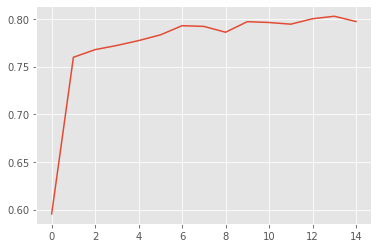

In [56]:
plt.plot(history.history['accuracy'])

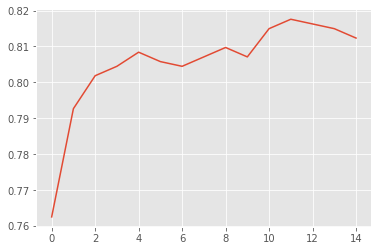

In [57]:
plt.plot(history.history['val_accuracy'])

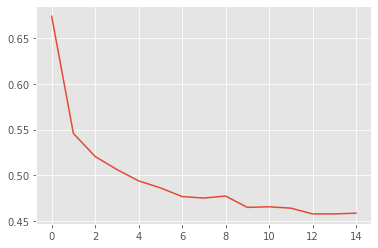

In [58]:
plt.plot(history.history['loss'])